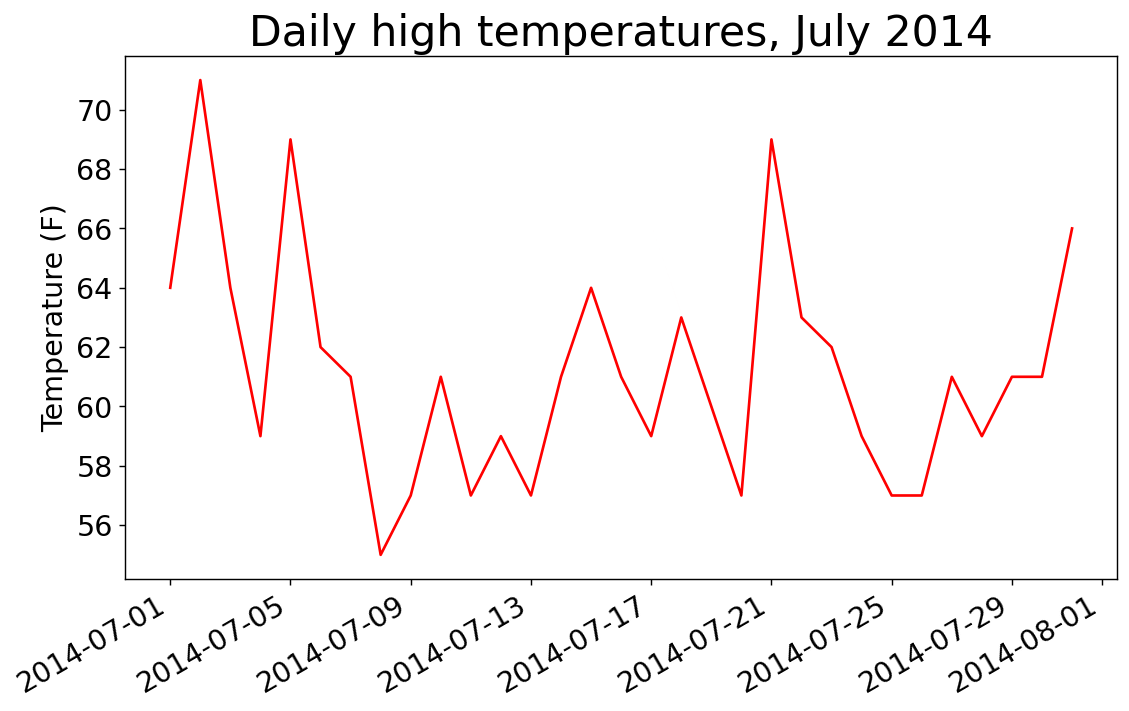

In [15]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

file_name='sitka_weather_07-2014.csv'
with open(file_name) as f:
     reader=csv.reader(f)
     header_row=next(reader)
     #print(header_row)
     # for index,column_header in enumerate(header_row):
            #print(index,column_header)
    
     dates,highs=[],[]
     for row in reader:
          current_date=datetime.strptime(row[0],'%Y-%m-%d')
          dates.append(current_date)
          highs.append(int(row[1]))   
     #print(highs)
     
     #plot the high temperatures
     fig=plt.figure(dpi=128,figsize=(10,6))
     plt.plot(dates,highs,c='red')
     plt.title("Daily high temperatures, July 2014",fontsize=24)
     plt.xlabel('',fontsize=16)
     fig.autofmt_xdate()
     plt.ylabel("Temperature (F)",fontsize=16)
     plt.tick_params(axis='both',which='major',labelsize=16)
     
     plt.show()
     
      
     

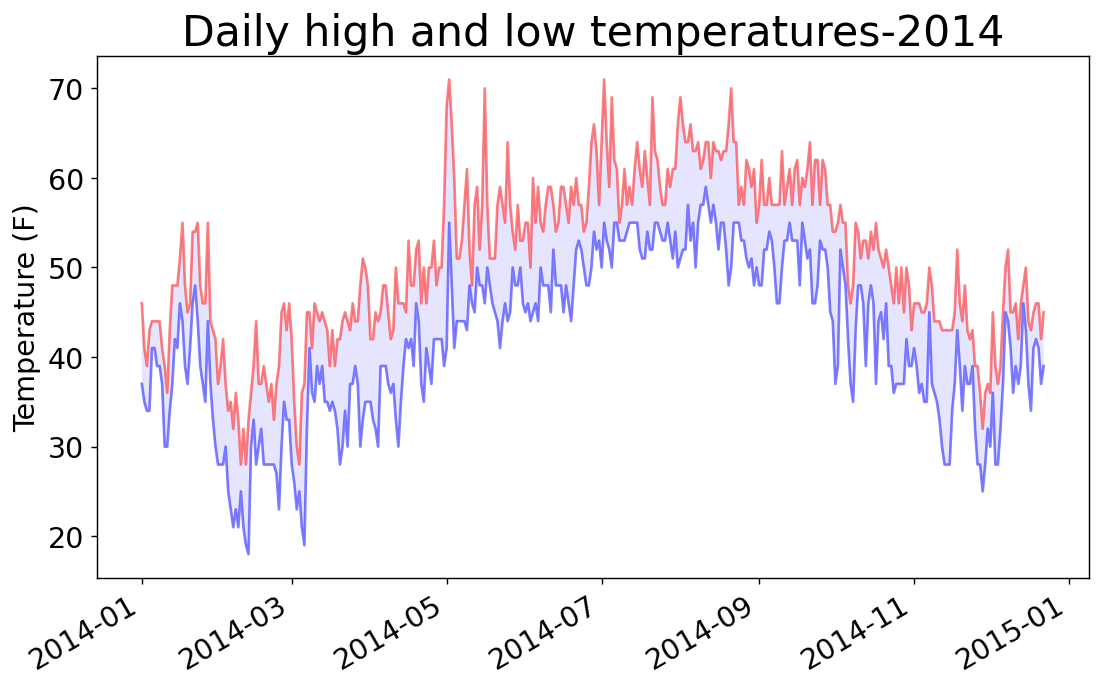

In [23]:
file_name='sitka_weather_2014.csv'
with open(file_name) as f:
     reader=csv.reader(f)
     header_row=next(reader)
     #print(header_row)
     # for index,column_header in enumerate(header_row):
            #print(index,column_header)
    
     dates,highs,lows=[],[],[]
     for row in reader:
          current_date=datetime.strptime(row[0],'%Y-%m-%d')
          dates.append(current_date)
          highs.append(int(row[1]))   
          lows.append(int(row[3]))
     #print(highs)
     
     #plot the high temperatures
     fig=plt.figure(dpi=128,figsize=(10,6))
     plt.plot(dates,highs,c='red',alpha=0.5)
     plt.plot(dates,lows,c='blue',alpha=0.5)
     plt.fill_between(dates,highs,lows,facecolor='blue',alpha=0.1)
     plt.title("Daily high and low temperatures-2014",fontsize=24)
     plt.xlabel('',fontsize=16)
     fig.autofmt_xdate()
     plt.ylabel("Temperature (F)",fontsize=16)
     plt.tick_params(axis='both',which='major',labelsize=16)
     
     plt.show()
     
    
    

2014-02-16 00:00:00 missing data


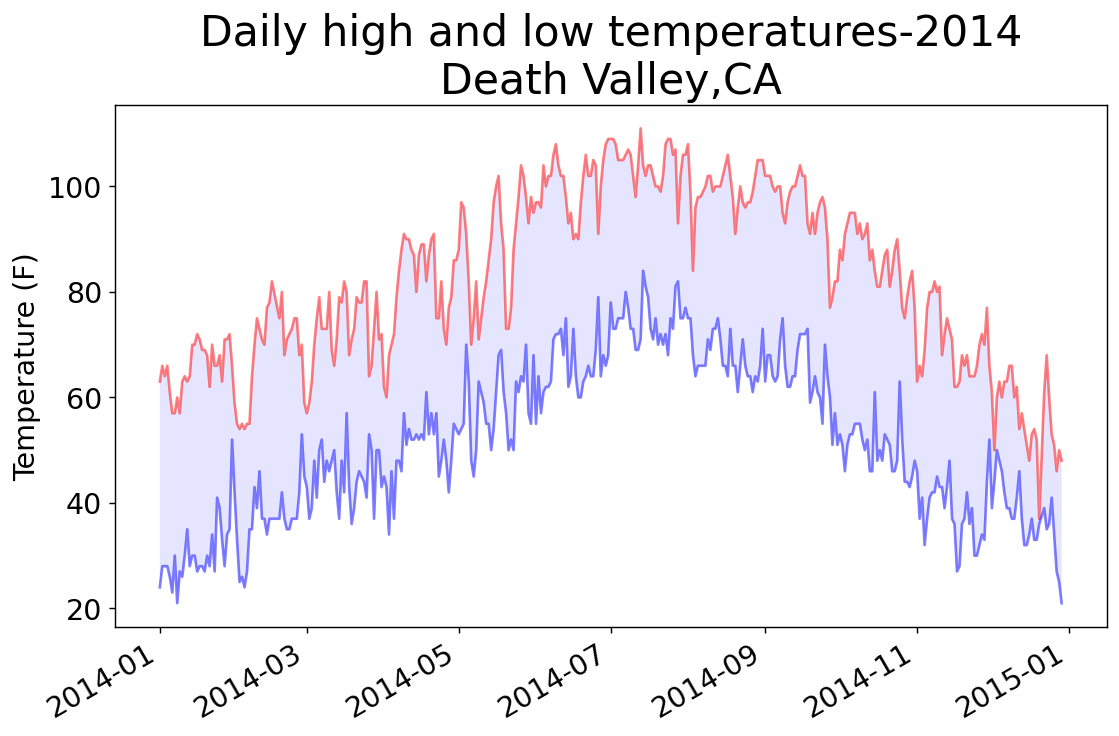

In [26]:
file_name='death_valley_2014.csv'
with open(file_name) as f:
     reader=csv.reader(f)
     header_row=next(reader)
     #print(header_row)
     # for index,column_header in enumerate(header_row):
            #print(index,column_header)
    
     dates,highs,lows=[],[],[]
     for row in reader:
          try:
               current_date=datetime.strptime(row[0],'%Y-%m-%d')     
               high=int(row[1])
               low=int(row[3])
          except ValueError:
               print(current_date,'missing data')
          else:
               dates.append(current_date)
               highs.append(int(row[1]))   
               lows.append(int(row[3]))
               
     #print(highs)
     
     #plot the high temperatures
     fig=plt.figure(dpi=128,figsize=(10,6))
     plt.plot(dates,highs,c='red',alpha=0.5)
     plt.plot(dates,lows,c='blue',alpha=0.5)
     plt.fill_between(dates,highs,lows,facecolor='blue',alpha=0.1)
     plt.title("Daily high and low temperatures-2014\nDeath Valley,CA",fontsize=24)
     plt.xlabel('',fontsize=16)
     fig.autofmt_xdate()
     plt.ylabel("Temperature (F)",fontsize=16)
     plt.tick_params(axis='both',which='major',labelsize=16)
     
     plt.show()

Missing data for 2014-02-16 00:00:00


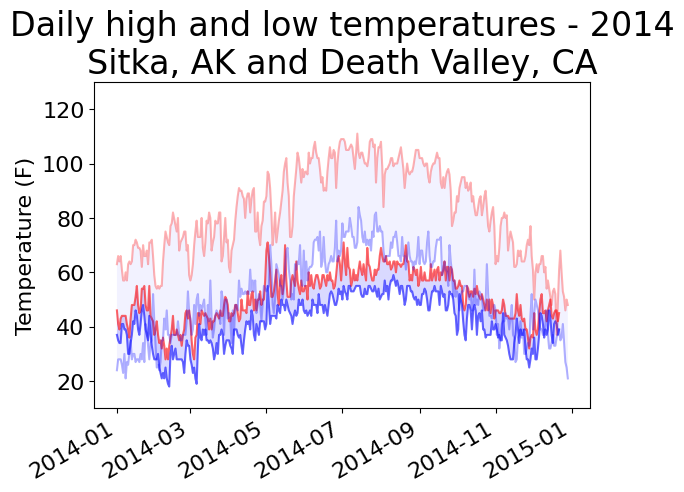

In [32]:

def get_weather_data(filename, dates, highs, lows, date_index, high_index,
        low_index):
    """Get the highs and lows from a data file."""
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        # Get dates, and high and low temperatures from this file.
        for row in reader:
            current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
            try:
                high = int(row[high_index])
                low = int(row[low_index])
            except ValueError:
                print(f"Missing data for {current_date}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

# Get weather data for Sitka.
filename = 'sitka_weather_2014.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=0, high_index=1,
        low_index=3)

# Plot Sitka weather data.

fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.6)
ax.plot(dates, lows, c='blue', alpha=0.6)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.15)

# Get weather data for Death Valley.
filename = 'death_valley_2014.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=0, high_index=1,
        low_index=3)

# Add Death Valley data to current plot.
ax.plot(dates, highs, c='red', alpha=0.3)
ax.plot(dates, lows, c='blue', alpha=0.3)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)

# Format plot.
title = "Daily high and low temperatures - 2014"
title += "\nSitka, AK and Death Valley, CA"
plt.title(title, fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(10, 130)

plt.show()